<a href="https://colab.research.google.com/github/Ananya-Sharma0081/08_Classify-Plants-Based-on-Water-Needs_202401100300038/blob/main/08_Classify_Plants_Based_on_Water_Needs_202401100300038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv('plants.csv')
df.head()


,sunlight_hours,watering_freq_per_week,soil_type,water_need
0,7.789136,6,sandy,low
1,11.668008,4,loamy,high
2,9.003943,2,loamy,low
3,11.148641,5,loamy,low
4,9.384333,2,clay,high


In [16]:

df.info()

print("\n")
print("Look at unique values for each column")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sunlight_hours          100 non-null    float64
 1   watering_freq_per_week  100 non-null    int64  
 2   soil_type               100 non-null    object 
 3   water_need              100 non-null    object 
 4   soil_type_encoded       100 non-null    int64  
 5   water_need_encoded      100 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


Look at unique values for each column
sunlight_hours: [ 7.7891365  11.66800751  9.00394251 11.14864133  9.38433264  7.50888666
  3.11225706  8.33354217  7.85717523  7.62716088  6.38764455  6.81522264
  4.6788678   6.71243962  3.17311496  9.85691837  3.0435465   1.93462919
  5.79870629  8.24138183  5.81488507  4.04429545  7.13988302  4.81702569
 11.26154459 11.14909654  6.52609002  4.60672393  9.10845655  1

In [18]:
print(df['water_need'].value_counts())


water_need
low       44
medium    29
high      27
Name: count, dtype: int64


In [17]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('plants.csv')


soil_encoder = LabelEncoder()
data['soil_type_encoded'] = soil_encoder.fit_transform(data['soil_type'])


target_encoder = LabelEncoder()
data['water_need_encoded'] = target_encoder.fit_transform(data['water_need'])


X = data[['sunlight_hours', 'watering_freq_per_week', 'soil_type_encoded']]
y = data['water_need_encoded']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


Accuracy: 0.48148148148148145

Classification Report:
              precision    recall  f1-score   support

        high       0.50      0.50      0.50         8
         low       0.33      0.38      0.35         8
      medium       0.60      0.55      0.57        11

    accuracy                           0.48        27
   macro avg       0.48      0.47      0.47        27
weighted avg       0.49      0.48      0.49        27



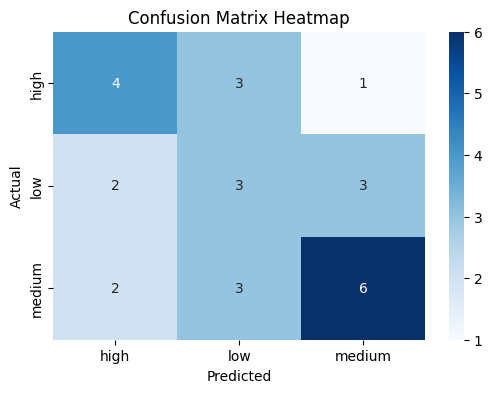

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
